In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('Nhom06_Gender.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [2]:
y = list(df['gender'].values) #target values as string
X = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=1)

In [4]:
class NaiveBayesClassifier:
    
    def __init__(self, X, y):
        self.X, self.y = X, y       
        self.N = len(self.X) 
        self.dim = len(self.X[0]) 
        self.attrs = [[] for _ in range(self.dim)] 
        self.output_dom = {} # Output classes with the number of ocurrences in the training set
        self.data = [] # To store every row [Xi, yi]
                
        for i in range(len(self.X)):
            for j in range(self.dim):
                # if we have never seen this value for this attr before, 
                # then we add it to the attrs array in the corresponding position
                if not self.X[i][j] in self.attrs[j]:
                    self.attrs[j].append(self.X[i][j])                    
            # if we have never seen this output class before,
            # then we add it to the output_dom and count one occurrence for now
            if not self.y[i] in self.output_dom.keys():
                self.output_dom[self.y[i]] = 1
            # otherwise, we increment the occurrence of this output in the training set by 1
            else:
                self.output_dom[self.y[i]] += 1
            # store the row
            self.data.append([self.X[i], self.y[i]])
            

    def classify(self, entry):
        solve = None # Final result
        max_arg = -1 # partial maximum
        for y in self.output_dom.keys():
            prob = self.output_dom[y]/self.N # P(y)
            for i in range(self.dim):
                cases = [x for x in self.data if x[0][i] == entry[i] and x[1] == y] # all rows with Xi = xi
                n = len(cases)
                prob *= n/self.N # P *= P(Xi = xi)                
            # if we have a greater prob for this output than the partial maximum...
            if prob > max_arg:
                max_arg = prob
                solve = y
        return solve

In [5]:
nbc = NaiveBayesClassifier(X_train, y_train)
total_cases = len(y_val) 

good = 0
bad = 0

Actual = []
Predicted = []

for i in range(total_cases):
    predict = nbc.classify(X_val[i])
    Actual.append(y_val[i])
    Predicted.append(predict)

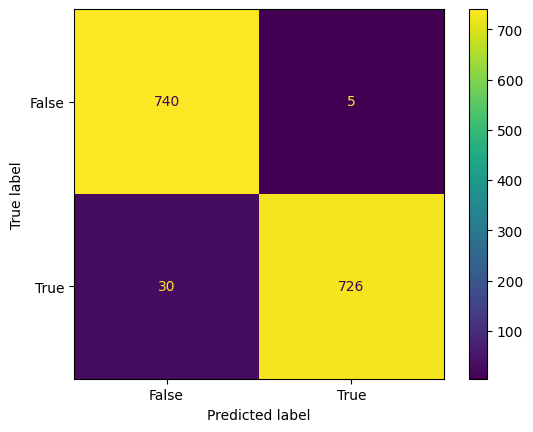

In [6]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Actual, Predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [7]:
from sklearn.metrics import classification_report
target_names = ['Female', 'Male']
print(classification_report(Actual, Predicted, target_names=target_names))
print("Accuracy: ", metrics.accuracy_score(Actual, Predicted))

              precision    recall  f1-score   support

      Female       0.96      0.99      0.98       745
        Male       0.99      0.96      0.98       756

    accuracy                           0.98      1501
   macro avg       0.98      0.98      0.98      1501
weighted avg       0.98      0.98      0.98      1501

Accuracy:  0.9766822118587608
